<a href="https://colab.research.google.com/github/MK316/workshops/blob/main/20230126_yonsei/ILIS_139th_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🌱 **주제: 디지털시대의 음성언어자료 이해 및 활용 [1]** 
(Leveraging the Potential of Spoken Data in the AI-Powered Digital Age)

# 🎬Introduction (Lecture slides: 4 pages)

In [ ]:
#@markdown 💠 Lecture slide (#1)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.001.jpeg', width=800, height=500)

In [ ]:
#@markdown 💠 Lecture slide (#2)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.002.jpeg', width=800, height=500)

In [ ]:
#@markdown 💠 Lecture slide (#3)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.003.jpeg', width=800, height=500)

In [ ]:
#@markdown 💠 Lecture slide (#4)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.004.jpeg', width=800, height=500)

---
# 📘 Topic [1]: Written language vs. Spoken language

---


## 1. Data size: characters vs. audio as digital data

1 KB = 1,024 bytes  
1 MB =  (1,024)² = 1,048,576 bytes  
1 GB = (1,024)³

In [12]:
#@markdown 🔄 [1] Memory size of a text:
import sys

ask = input("Type anything to check the memory size:  ")

size = sys.getsizeof(ask)
print('It takes %s bytes.'%size)

Type anything to check the memory size:  안녕하세요
It takes 84 bytes.


[2] Memory size of an audio (speech)

In [13]:
#@markdown 🔄 Making functions: etts('text'), ktts('text')
%%capture
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

def etts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "en",
                    slow = False)
  
  gtts_object.save("E-audio.wav")
  return Audio("E-audio.wav")


def ktts(text):
  text_to_say = text

  gtts_object = gTTS(text = text_to_say,
                     lang = "ko",
                    slow = False)
  
  gtts_object.save("K-audio.wav")
  return Audio("K-audio.wav")

In [14]:
#@markdown 🔄 TTS (synthesize speech)

language = "ko" #@param ["en","ko"]

mytext = input("Type text to create an audio:  ")

if language == "en":
  etts(mytext)
  myaudio = "E-audio.wav"
elif language == "ko":
  ktts(mytext)
  myaudio = "K-audio.wav"

import os
audio_file = myaudio # replace with the name of your audio file

# Get the file size in bytes
file_size = os.path.getsize(audio_file)

# Print the file size
print("="*50)
print("File size: ", file_size, "bytes")
Audio(myaudio)

Type text to create an audio:  안녕하세요
File size:  5088 bytes


**Note:** gTTS generated audio is for SOUND PLAY (not for ANALYSIS) compressed in size.

=> We can covert gTTS sound to a readable audio file.

### What is sound? (Sound data)

In [16]:
#@markdown 🔄 (1/3) Specify file names to convert: 
inaudio = input("Type the input file name to convert: ")
outaudio = input("Type the output file name to save: ")

Type the input file name to convert: K-audio.wav
Type the output file name to save: sample.wav


In [17]:
#@markdown 🔄 (2/3) Converting TTS to readable audio wav
%%capture
!ffmpeg -i {inaudio} -acodec pcm_s16le -ar 44100 {outaudio}

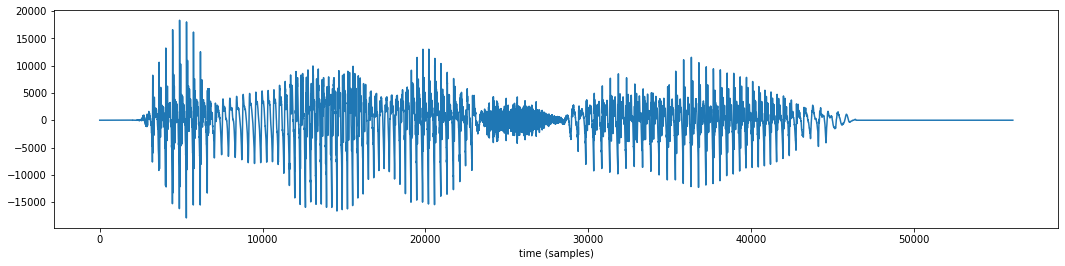

In [20]:
#@markdown 🔄 (3/3) Display waveform: 
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

fs, data = wavfile.read(outaudio) # replace with the name of your audio file
plt.figure(figsize=(18,4))
plt.xlabel('time (samples)')
plt.plot(data)
plt.show()


Note: time (in seconds) = samples / sampling rate (44.1kHz)

In [ ]:
#@markdown Zoom in the waveform (0.52~0.8 seconds = 23000 ~ 35000 samples)
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the waveform data
rate, data = wavfile.read('/content/sample.wav')

# Plot the waveform
fig, ax = plt.subplots(figsize = (18,3))

ax.plot(data)

# Set the x-axis limits to zoom in on a specific time period
start_time = 0.52 # start time in seconds
end_time = 0.8 # end time in seconds
ax.set_xlim(start_time * rate, end_time * rate)


plt.show()



---


# 📘 Topic [2]: Understanding sound wave


---



### A. Sound wave: air vibration (invisible)

Make vibration visible: [videolink](https://www.youtube.com/watch?v=aPswnDcteS4) (22 seconds)

In [ ]:
#@markdown 🔄 Visible waves: This is a visualisation of sound waves caused by a moving string.
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("aPswnDcteS4", width=500)
display(video)

### B. Simple vs. complex sounds (=speech sounds)

Sound: 
  + 파장 > 주기 > 주파수(Frequency)
  + 진폭(Amplitude; Intensity)
  + 위상(Phase; Degress of displacement)

![](https://miro.medium.com/max/700/0*QFVha2lCgyhKjhuO.gif)





### C. Creating sounds

In [29]:
#@markdown A. Creating simple waves:

from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
from numpy import sin, pi, arange, real, imag

def plot_oscillation(amplitude=5, frequency=5, theta=1):
    sampling_frequency=500
    time = arange(-1, 1 + 1/sampling_frequency, 1/sampling_frequency)
    simulation = amplitude * sin(2 * pi * frequency * time + theta)

    fig = plt.figure(figsize=(20, 4))
    gs = plt.GridSpec(1, 6, left=0.05, right=0.48, wspace=0.05)
    ax1 = fig.add_subplot(gs[0, :4])
    ax1.plot(time, simulation, linewidth=2)
    ax1.set_ylabel('Amplitude', fontsize=18)
    ax1.set_xlabel('Time', fontsize=18)
    ax2 = fig.add_subplot(gs[0, 5:], polar=True)
    ax2.plot(real(simulation), imag(simulation))
    plt.tight_layout()

interact(plot_oscillation, amplitude=FloatSlider(value=5, min=0, max=10, step=0.5),
         frequency=FloatSlider(value=5, min=0, max=10, step=0.5), 
         theta=FloatSlider(value=0, min=-5, max=5, step=0.5))

interactive(children=(FloatSlider(value=5.0, description='amplitude', max=10.0, step=0.5), FloatSlider(value=5…

<function __main__.plot_oscillation(amplitude=5, frequency=5, theta=1)>

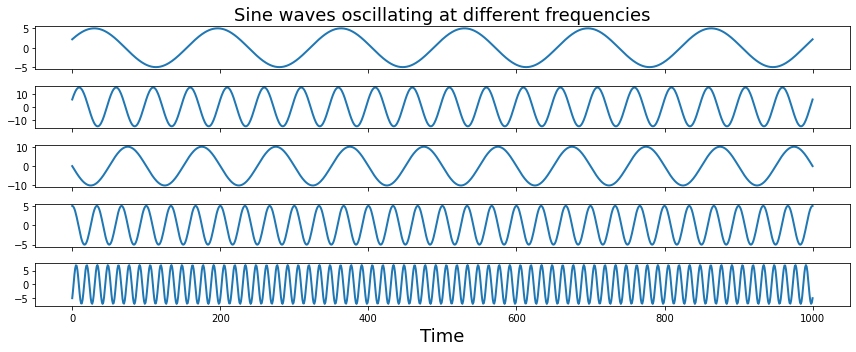

In [30]:
#@markdown B. Creating multiple simple waves: Sampling rate = 500 HZ
import numpy as np

sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()

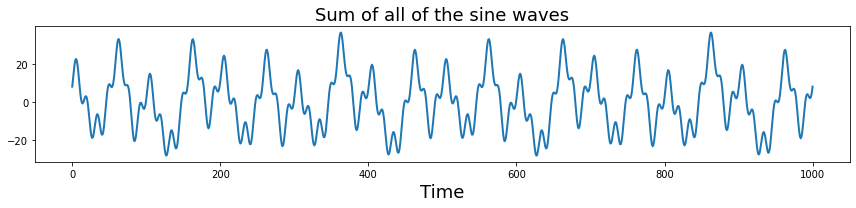

In [31]:
#@markdown C. Let's add all of those signals together to get a more complex signal.
plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()

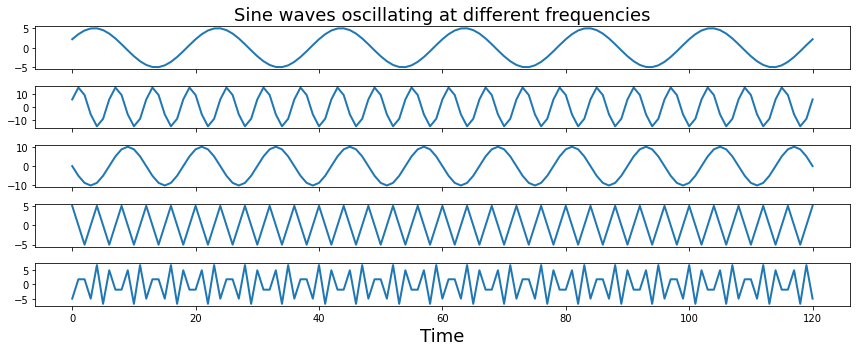

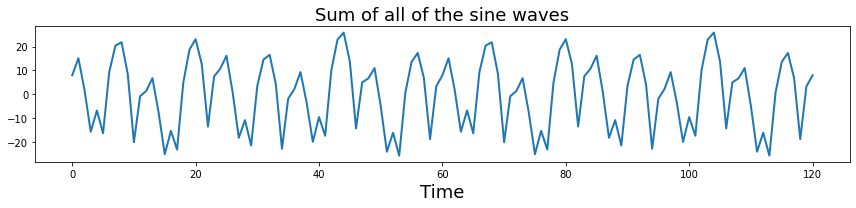

In [32]:
#@markdown D. Downsampling from 500 Hz to 60 Hz (downsampling)

sampling_freq = 60

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    


plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()    


Text(0.5, 0, 'Time')

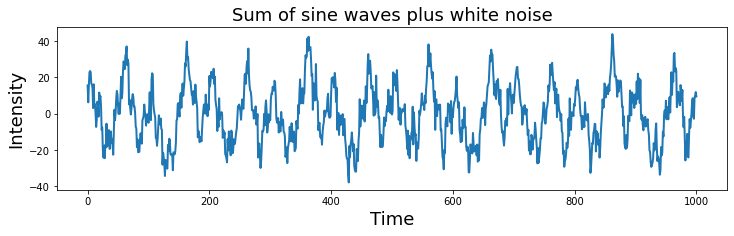

In [ ]:
#@markdown E. More realistic sound waves (with Gaussian white noise = closer to real speech sound)
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


noise = 5 * np.random.randn(sine_waves.shape[1])
signal = np.sum(sine_waves,axis=0) + noise

plt.figure(figsize=(12,3))
plt.plot( signal, linewidth=2)
plt.title("Sum of sine waves plus white noise", fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

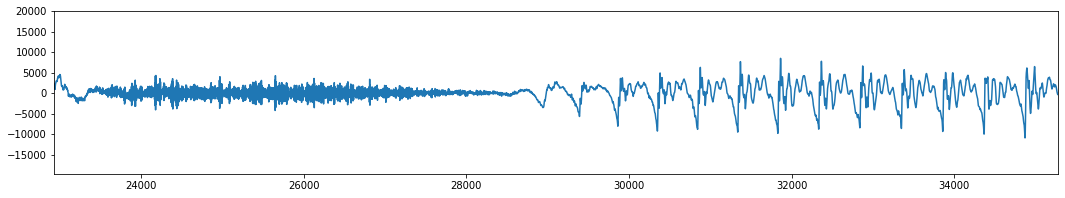

In [33]:
#@markdown 🔄 Real speech audio: Zoom in the waveform (0.52~0.8 seconds = 23000 ~ 35000 samples)
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the waveform data
rate, data = wavfile.read('/content/sample.wav')

# Plot the waveform
fig, ax = plt.subplots(figsize = (18,3))

ax.plot(data)

# Set the x-axis limits to zoom in on a specific time period
start_time = 0.52 # start time in seconds
end_time = 0.8 # end time in seconds
ax.set_xlim(start_time * rate, end_time * rate)


plt.show()



---


# 📘 Topic [3]: Spoken language analysis


---



In [ ]:
#@markdown 💠 Lecture slide (#5)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.005.jpeg', width=800, height=500)

In [ ]:
#@markdown 🔄 1) Articulatory phonetics: Video (30 seconds.)
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("wYwk07QM4rc", width=500)
display(video)


2) Acoustic phonetics: Doing phonetics using computer

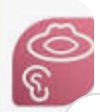

Praat: a software program used for analyzing speech and other sounds. [Software download](https://www.fon.hum.uva.nl/praat/)

* **open-source** software.
* on both **MAC, Windows**
* measuring **pitch, formants, intensity, and duration**; spectrogram analysis, pitch detection, formant analysis, and more.
* widely used in **phonetics, speech therapy, and other fields that involve sound analysis.**
* includes a built-in **scripting language** for automating and extending its functionality.
* a powerful tool for **sound analysis and manipulation.**



## VOT and Pitch in Korean stop sounds:  
예문: "**바**다가 보인다", "**파**도가 보인다", "**빠**리가 보인다"

In [ ]:
:#@markdown 💠 Praat annotation (#1)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/data/tone01.png', width=1200, height=500)

In [41]:
#@markdown Original sounds: 바, 파, 빠
from IPython.display import Audio

Audio("/content/sample_Cs.wav")

In [37]:
#@markdown Pitch manipulated sounds: A, B, C?
from IPython.display import Audio

Audio("/content/New_Cs.wav")

# 🌀 SEOUL Corpus

[Link to download the corpus](https://www.openslr.org/113/)

In [ ]:
#@markdown 💠 SEOUL Corpus: Praat annotation (#2)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/slides/slides.006.jpeg', width=800, height=500)

In [ ]:
#@markdown 💠 SEOUL Corpus: Praat annotation (#3)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/data/seoulcorpus01.png', width=1200, height=500)

In [ ]:
#@markdown 💠 SEOUL Corpus: Praat annotation (#3)
from IPython.display import Image
Image(url='https://github.com/MK316/workshops/raw/main/20230126_yonsei/data/seoulcorpus02.png', width=1200, height=500)

# 🍎 References


1. [Signal Processing](https://colab.research.google.com/github/ljchang/dartbrains/blob/master/content/Signal_Processing.ipynb#scrollTo=BcsjBMJGhoh3)
2. [서울코퍼스의 한국어파열음 연구 - 윤규철](https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002590755)
3. 참고도서 [Praat & Scripting (윤규철)](https://product.kyobobook.co.kr/detail/S000061775813)
4. [Seoul Corpus](https://www.openslr.org/113/)



---

➡️ Move on to the second part